In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys

1) Pandas solution

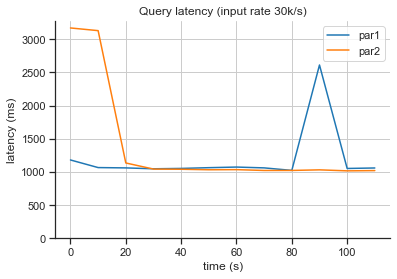

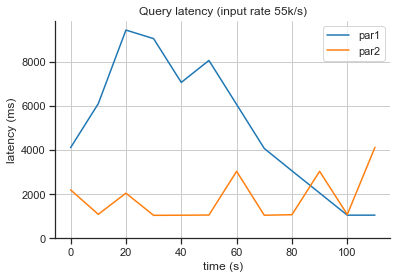

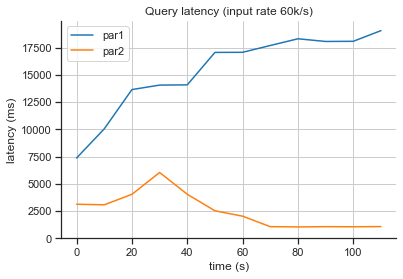

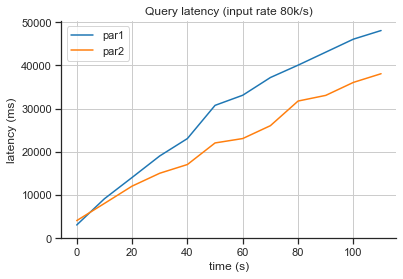

In [124]:
for rate in [30, 55, 60, 80]:
    # parallelism1
    df1 = {}
    df1['q1'] = pd.read_csv("{0}k/output_clicks-query-1parallelism-1".format(rate) ,sep='\t',header=None)
    df1['q2'] = pd.read_csv("{0}k/output_clicks-query-2parallelism-1".format(rate) ,sep='\t',header=None)
    a = (df1['q1'].groupby(2)[3].mean().reset_index(drop=True) + df1['q2'].groupby(2)[3].mean().reset_index(drop=True))/2
    # parallelism2
    df2 = {}
    df2['q1_1'] = pd.read_csv("{0}k/output_clicks-query-1parallelism-2/1".format(rate) ,sep='\t',header=None)
    df2['q1_2'] = pd.read_csv("{0}k/output_clicks-query-1parallelism-2/2".format(rate) ,sep='\t',header=None)
    df2['q2_1'] = pd.read_csv("{0}k/output_clicks-query-2parallelism-2/1".format(rate) ,sep='\t',header=None)
    df2['q2_2'] = pd.read_csv("{0}k/output_clicks-query-2parallelism-2/2".format(rate) ,sep='\t',header=None)
    b = (df2['q1_1'].groupby(2)[3].mean().reset_index(drop=True) + df2['q1_2'].groupby(2)[3].mean().reset_index(drop=True)
        +df2['q2_1'].groupby(2)[3].mean().reset_index(drop=True) + df2['q2_2'].groupby(2)[3].mean().reset_index(drop=True))/4
    a = a[:12]
    b = b[:12]
    sns.set(style='ticks')
    fig, ax = plt.subplots()
    ax.plot([x*10 for x in range(len(a))], a, color='tab:blue', label='par1')
    ax.plot([x*10 for x in range(len(b))], b, color='tab:orange', label='par2')
    ax.legend()
    ax.set(xlabel='time (s)', ylabel='latency (ms)',
           title='Query latency (input rate {0}k/s)'.format(rate))

    ax.grid(True, which='both')
    ax.set_ylim(bottom=0)
    fig.savefig("latency_plot_rate{0}.png".format(rate))
    sns.despine(ax=ax, offset=0) # the important part here
    

In [73]:
# data = {}
# data['latencies'] = []
# data['times'] = []
# with open("{0}k/output_clicks-query-2parallelism-1".format(rate)) as f:
#     for i,line in enumerate(f):
# #         print(line)
#         data['latencies'].append(int(line.split()[3]))
#         data['times'].append(i*10) 
        
# data2 = {}
# data2['latencies'] = []
# data2['times'] = []
# with open("{0}k/output_clicks-query-2parallelism-2/1".format(rate)) as f:
#     for i,line in enumerate(f):
# #         print(line)
#         data2['latencies'].append(int(line.split()[3]))
#         data2['times'].append(i*10)  
        
# sns.set(style='ticks')
# fig, ax = plt.subplots()
# a = df.groupby(2)[3].mean().reset_index(drop=True)
# ax.plot([x*10 for x in range(len(a))], a, color='tab:blue')
# # ax.plot(data2['times'], data2['latencies'], color='tab:orange')


# ax.set(xlabel='time (s)', ylabel='latency (ms)',
#        title='Query latency (input rate {0}k/s)'.format(rate))

# ax.grid(True, which='both')
# ax.set_ylim(bottom=0)

# # fig.savefig("test.png")
# sns.despine(ax=ax, offset=0) # the important part here
        